# Analysis of Synthetic Gaming Data

This notebook performs a basic exploratory analysis of the synthetic dataset
generated by the `generate_data` script.

The goal is to demonstrate how the generated data can be consumed by analytics
or BI workflows after being produced by a simple data engineering pipeline.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 5)
pd.set_option("display.max_columns", None)

## 1. Load Data

We load users and purchases from the CSV files generated by `generate_data.py`.

Make sure you have already run:

```bash
python src/generate_data.py
before executing this notebook.

In [7]:
users_path = "data/users.csv"
purchases_path = "data/purchases.csv"

users = pd.read_csv(users_path)
purchases = pd.read_csv(purchases_path)

users.head(), purchases.head()

(                                user_id             name  age      country
 0  bdd640fb-0667-4ad1-9c80-317fa3b1799d     Daniel Doyle   56  Philippines
 1  16419f82-8b9d-4434-a465-e150bd9c66b3     Amanda Davis   23     Djibouti
 2  8fadc1a6-06cb-4fb3-9a1d-e644815ef6d1  Matthew Gardner   17       Cyprus
 3  cf36d58b-4737-4190-96da-1dac72ff5d2a     Olivia Moore   33      Jamaica
 4  371ecd7b-27cd-4130-8722-9389571aa876  Gabrielle Davis   31       Bhutan,
                             purchase_id                               user_id  \
 0  04e1502a-a761-40c7-bd28-3421243f45fe  d2d33488-d0c3-4018-ae3c-dd4f55b145e4   
 1  0bb9a8f6-9e4d-4214-ab03-4c4ee83cdff9  3f5fbf4f-d417-4230-9274-ee11b61df906   
 2  03ad702e-216a-4bcf-a616-dde4b388300a  42378962-e4fd-4c34-9670-7a2129dc073e   
 3  4eada8d3-e797-43ae-8cca-0c05a1f619ed  6adfd568-b5ca-4993-aaca-d101f1530f68   
 4  9c794cdb-74c8-4361-98e8-24e9cb2fbbc3  e4c1d210-74be-4b20-9c32-f8a06a7580e2   
 
         item  amount            timestamp  
 0  

## 2. Basic Structure and Summary

Check schema, row counts, and simple statistics to understand the dataset.

In [8]:
print("Users shape:", users.shape)
print("Purchases shape:", purchases.shape)

print("\nUsers dtypes:")
print(users.dtypes)

print("\nPurchases dtypes:")
print(purchases.dtypes)

print("\nUsers sample:")
display(users.head())

print("\nPurchases sample:")
display(purchases.head())

Users shape: (1000, 4)
Purchases shape: (5000, 5)

Users dtypes:
user_id    object
name       object
age         int64
country    object
dtype: object

Purchases dtypes:
purchase_id     object
user_id         object
item            object
amount         float64
timestamp       object
dtype: object

Users sample:


,user_id,name,age,country
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Daniel Doyle,56,Philippines
1,16419f82-8b9d-4434-a465-e150bd9c66b3,Amanda Davis,23,Djibouti
2,8fadc1a6-06cb-4fb3-9a1d-e644815ef6d1,Matthew Gardner,17,Cyprus
3,cf36d58b-4737-4190-96da-1dac72ff5d2a,Olivia Moore,33,Jamaica
4,371ecd7b-27cd-4130-8722-9389571aa876,Gabrielle Davis,31,Bhutan



Purchases sample:


,purchase_id,user_id,item,amount,timestamp
0,04e1502a-a761-40c7-bd28-3421243f45fe,d2d33488-d0c3-4018-ae3c-dd4f55b145e4,Boost,44.04,2025-07-03 00:05:07
1,0bb9a8f6-9e4d-4214-ab03-4c4ee83cdff9,3f5fbf4f-d417-4230-9274-ee11b61df906,Loot Box,68.49,2025-04-05 05:57:55
2,03ad702e-216a-4bcf-a616-dde4b388300a,42378962-e4fd-4c34-9670-7a2129dc073e,Loot Box,93.38,2025-03-08 21:28:37
3,4eada8d3-e797-43ae-8cca-0c05a1f619ed,6adfd568-b5ca-4993-aaca-d101f1530f68,Loot Box,43.90,2025-11-15 17:50:38
4,9c794cdb-74c8-4361-98e8-24e9cb2fbbc3,e4c1d210-74be-4b20-9c32-f8a06a7580e2,Gold Pack,88.16,2025-03-08 06:56:25


## 3. Join Users and Purchases

We join purchases with user data to enable user-level and country-level analysis.

In [9]:
data = purchases.merge(users, on="user_id", how="left", suffixes=("_purchase", "_user"))

data.head()

,purchase_id,user_id,item,amount,timestamp,name,age,country
0,04e1502a-a761-40c7-bd28-3421243f45fe,d2d33488-d0c3-4018-ae3c-dd4f55b145e4,Boost,44.04,2025-07-03 00:05:07,Valerie Taylor,47,Gibraltar
1,0bb9a8f6-9e4d-4214-ab03-4c4ee83cdff9,3f5fbf4f-d417-4230-9274-ee11b61df906,Loot Box,68.49,2025-04-05 05:57:55,Megan Burns,51,Morocco
2,03ad702e-216a-4bcf-a616-dde4b388300a,42378962-e4fd-4c34-9670-7a2129dc073e,Loot Box,93.38,2025-03-08 21:28:37,Melissa Mitchell,56,Hungary
3,4eada8d3-e797-43ae-8cca-0c05a1f619ed,6adfd568-b5ca-4993-aaca-d101f1530f68,Loot Box,43.90,2025-11-15 17:50:38,Stephanie Ferguson,25,Turkey
4,9c794cdb-74c8-4361-98e8-24e9cb2fbbc3,e4c1d210-74be-4b20-9c32-f8a06a7580e2,Gold Pack,88.16,2025-03-08 06:56:25,Lindsey Simmons,55,Cocos (Keeling) Islands


## 4. Key Metrics

We compute a few simple KPIs to understand the synthetic business:

- number of users
- number of purchases
- total revenue
- average purchase value
- average number of purchases per user

In [10]:
n_users = users["user_id"].nunique()
n_purchases = purchases["purchase_id"].nunique()
total_revenue = purchases["amount"].sum()
avg_purchase_value = purchases["amount"].mean()
avg_purchases_per_user = n_purchases / n_users if n_users > 0 else 0

print(f"Number of users: {n_users}")
print(f"Number of purchases: {n_purchases}")
print(f"Total revenue: {total_revenue:.2f}")
print(f"Average purchase value: {avg_purchase_value:.2f}")
print(f"Average purchases per user: {avg_purchases_per_user:.2f}")

Number of users: 1000
Number of purchases: 5000
Total revenue: 248655.83
Average purchase value: 49.73
Average purchases per user: 5.00


## 5. Revenue by Country

We aggregate revenue at the country level to simulate a typical BI use case.

In [15]:
revenue_by_country = (
    data.groupby("country")["amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

revenue_by_country



country
Oman     3234.19
Togo     3064.09
          ...   
Kenya    2184.37
China    2170.78
Name: amount, Length: 10, dtype: float64

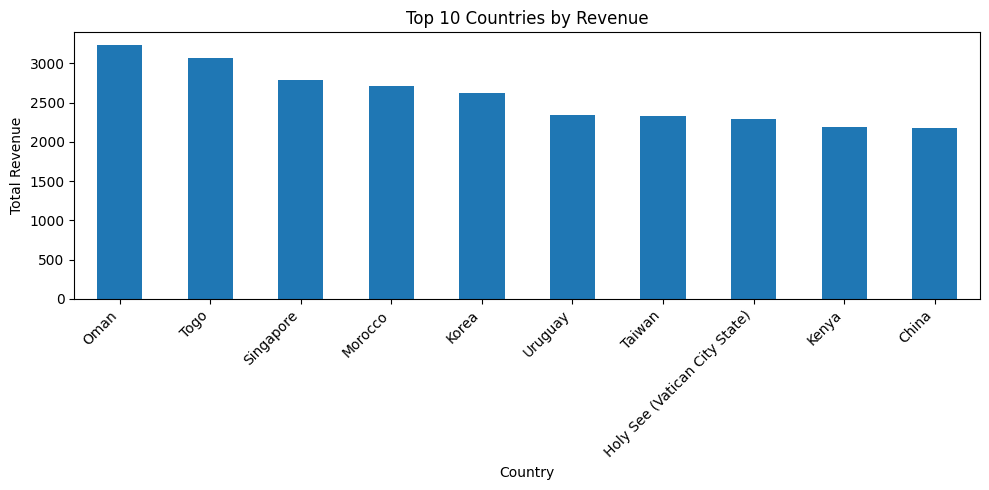

In [16]:
plt.figure(figsize=(10, 5))
revenue_by_country.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 6. Purchase Distribution by Item Type

We check how revenue and volume are distributed across item types.

In [13]:
items_summary = (
    purchases.groupby("item")["amount"]
    .agg(["count", "sum", "mean"])
    .sort_values(by="sum", ascending=False)
)

items_summary

,count,sum,mean
item,,,
Loot Box,1309,65341.53,49.917135
Boost,1241,63697.05,51.327196
Gold Pack,1236,59909.81,48.470720
Skins,1214,59707.44,49.182405


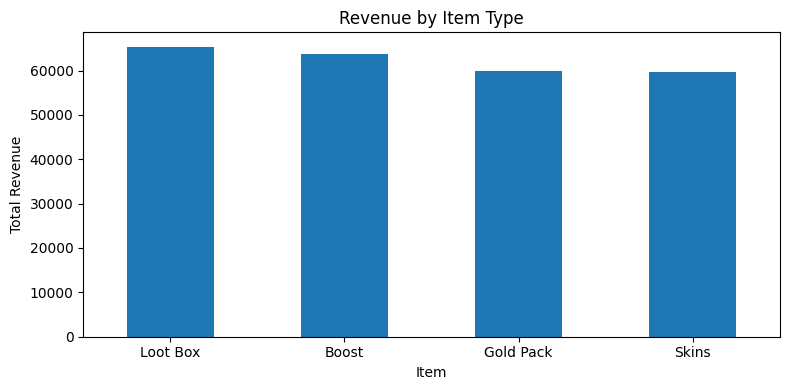

In [14]:
plt.figure(figsize=(8, 4))
items_summary["sum"].plot(kind="bar")
plt.title("Revenue by Item Type")
plt.xlabel("Item")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. Conclusion

This notebook illustrates how the synthetic dataset generated by the project can be:

- loaded from CSV files,
- joined into a single analytical table,
- used to compute basic KPIs,
- visualized for country-level and item-level insights.

In a real environment, this step would sit on top of a data engineering pipeline,
where data is regularly generated or ingested and stored in a production-grade
data warehouse or data lake.